In [1]:
%matplotlib inline

import gym
import itertools
import matplotlib
import numpy as np
import pandas as pd
import sys


if "../" not in sys.path:
  sys.path.append("../") 

from collections import defaultdict
from lib.envs.cliff_walking import CliffWalkingEnv
from lib import plotting

matplotlib.style.use('ggplot')

# Epsilon Greedy Policy

## def make_epsilon_greedy_policy(Q, epsilon, nA):

In [13]:
def make_epsilon_greedy_policy(Q, epsilon, nA):
    def policy_fn(observation):
        A = np.ones(nA, dtype=float) * epsilon / nA
            best_action = np.argmax(Q[observation])
            
        if list(Q[observation]).count(Q[observation][0]) == len(Q[observation]):
            best_action = np.random.choice(len(Q[observation]))
            
        A[best_action] += (1.0 - epsilon)
        return A
    return policy_fn

# Q-Learning Algorithm:

In [2]:
def q_learning(discount_factor=1.0, alpha=0.5, epsilon=0.05):
    
#     parameters to tune
    num_of_actions = 3

    Q = defaultdict(lambda: np.zeros(env.action_space.n))

#     this is for tracking
#     actioncount = defaultdict(int)
#     rewardcount = defaultdict(int)
#     statecount = defaultdict(int)
    
    policy = make_epsilon_greedy_policy(Q, epsilon, num_of_actions)

    # Reset the environment and pick the first action
    state = #TODO1 Get the initial state
        
    done = False
    while done is not True:
        action_probs = policy(state) #return the action probabilities
        action = np.random.choice(np.arange(len(action_probs)), p=action_probs)
    
#         action_space = (0, do nothing), (1, buy), (2, sell)
        if action == 0:
#             TODO2 do nothing
        if action == 1:
#             TODO3 buy
        if action == 2:
#             TODO4 sell:

#         based from the action you did:
        next_state = #TODO5 get next state/stock data
        reward = #TODO6 compute rewards/profit
        done = #TODO7 make this true if its on the end of the simulation
#             this is the observation = state/next state

        best_next_action = np.argmax(Q[next_state])    
        td_target = reward + discount_factor * Q[next_state][best_next_action]
        td_delta = td_target - Q[state][action]
        Q[state][action] += alpha * td_delta

#         for tracking
#         statecount[state] += 1
#         actioncount[action] += 1
#         rewardcount[reward] += 1

        state = next_state
        if done:
            break
      
#     for tracking
#     print()
#     print("StateCount:", statecount)
#     print("ActionCount:", actioncount)
#     print("RewardCount:", rewardcount)
    
    return Q, stats

SyntaxError: invalid syntax (<ipython-input-2-5b45fd00664a>, line 16)

# DYNA Q-Learning Algorithm:

In [104]:
def dyna_q_learning(discount_factor=1.0, alpha=0.5, epsilon=0.05):

    Q = defaultdict(lambda: np.zeros(env.action_space.n))

#     parameters to tune
    num_of_actions = 3

    '''<DYNA'''
    '''Table Creation'''
#     Note: if there is an indention error then the '''comment''' is the problem

    T = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: [0.000001, 0])))
#     create a Reward table
    R = defaultdict(lambda: defaultdict(int))
    '''DYNA>'''
    
#     for tracking 
#     actioncount = defaultdict(int)
#     rewardcount = defaultdict(int)
#     statecount = defaultdict(int)
    
    policy = make_epsilon_greedy_policy(Q, epsilon, env.action_space.n)

    # Reset the environment and pick the first action
    state = #TODO1 Get the initial state

    done = False
    while done is not True:

        action_probs = policy(state) #return the action probabilities
        action = np.random.choice(np.arange(len(action_probs)), p=action_probs)
        
#         action_space = (0, do nothing), (1, buy), (2, sell)
        if action == 0:
#             TODO2 do nothing
        if action == 1:
#             TODO3 buy
        if action == 2:
#             TODO4 sell:
        
#         based from the action you did:
        next_state = #TODO5 get next state/stock data
        reward = #TODO6 compute rewards/profit
        done = #TODO7 make this true if its on the end of the simulation

        best_next_action = np.argmax(Q[next_state])    
        td_target = reward + discount_factor * Q[next_state][best_next_action]
        td_delta = td_target - Q[state][action]
        Q[state][action] += alpha * td_delta

        '''<DYNA'''           
        '''Table Update'''
        T[state][action][next_state][0] += 1
        R[state][action] = (1-alpha)*R[state][action] + alpha*reward
        for s in T.keys():
            for a in T[s].keys():
                totalcount = 0
                for ns in T[s][a].keys():
                    totalcount += T[s][a][ns][0] 
                for ns in T[s][a].keys():
                    T[s][a][ns][1] = T[s][a][ns][0]/totalcount
        for i in range(10):
            '''Hallucination'''                             
            random_state = random.choice(list(T))
            random_action = random.choice(list(T[random_state].keys()))
            next_state_list = []
            next_state_transition_probabilties = []
            for ns in T[random_state][random_action].keys():
                next_state_list.append(ns)
                next_state_transition_probabilties.append(T[random_state][random_action][ns][1])
            next_state_index = np.random.choice(range(len(next_state_list)), p=next_state_transition_probabilties) 
            generated_next_state = next_state_list[next_state_index]           
            generated_reward = R[random_state][random_action]

            '''Update Q-Table'''
            best_next_action = np.argmax(Q[generated_next_state])    
            td_target = generated_reward + discount_factor * Q[generated_next_state][best_next_action]
            td_delta = td_target - Q[random_state][random_action]
            Q[random_state][random_action] += alpha * td_delta            

        '''DYNA>'''

        statecount[state] += 1
        actioncount[action] += 1
        rewardcount[reward] += 1

        if done:
            break
        state = next_state
    
#     print()
#     print("StateCount:", statecount)
#     print("ActionCount:", actioncount)
#     print("RewardCount:", rewardcount)
    totalreward = 0
    for key, value in rewardcount.items():
        totalreward += value
    
    return Q, stats, totalreward

# Test

In [27]:
Q, qstats = q_learning(env, 500)

Episode 500/500.
StateCount: defaultdict(<class 'int'>, {(15, 8, True): 2, (13, 2, False): 6, (20, 9, False): 5, (18, 9, False): 3, (13, 7, True): 1, (21, 7, True): 5, (7, 10, False): 2, (17, 10, False): 15, (15, 2, False): 7, (6, 10, False): 3, (9, 5, False): 4, (20, 10, False): 19, (12, 3, False): 8, (19, 3, False): 5, (16, 2, False): 4, (15, 6, False): 3, (5, 10, False): 5, (13, 8, False): 3, (18, 8, False): 3, (19, 10, False): 16, (10, 10, False): 5, (16, 4, False): 2, (18, 10, False): 22, (13, 6, False): 4, (19, 3, True): 1, (15, 3, False): 4, (16, 10, True): 1, (21, 10, True): 12, (16, 3, False): 5, (20, 8, True): 1, (19, 8, False): 3, (19, 5, False): 3, (20, 5, False): 6, (20, 8, False): 5, (14, 10, False): 26, (9, 3, False): 3, (11, 3, False): 3, (21, 8, True): 4, (15, 8, False): 3, (18, 3, False): 5, (18, 1, False): 2, (20, 4, False): 3, (14, 8, True): 1, (21, 10, False): 3, (13, 10, False): 18, (6, 6, False): 1, (14, 3, False): 7, (19, 4, False): 4, (16, 1, False): 4, (18, 4,

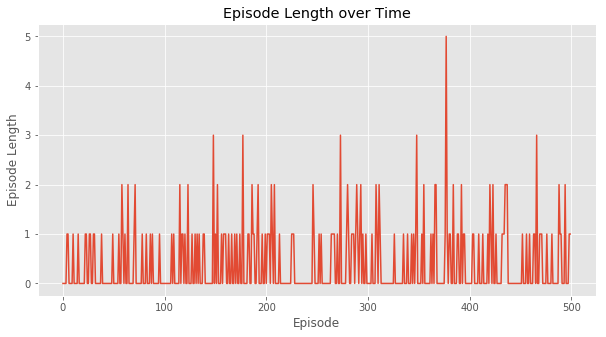

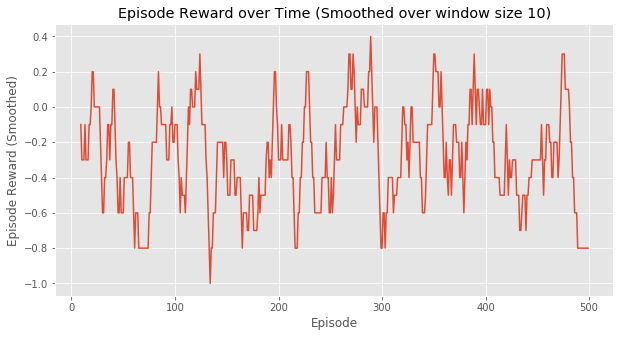

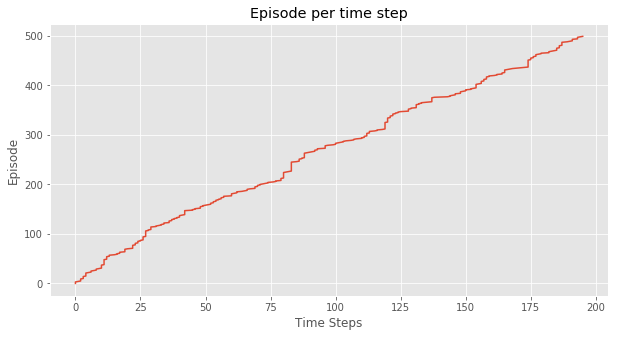

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [28]:
plotting.plot_episode_stats(qstats)